### Dataset:
#### Telco Customer Churn
#### Objektif : Melakukan prediksi perilaku untuk mempertahankan pelanggan. Dan melakukan pengembangan program retensi pelanggan yang terfokus

### Konten Dataset:
- Pelanggan yang pergi dalam sebulan terakhir
- Layanan yang telah didaftarkan oleh setiap pelanggan (Telepon, saluran, internet, online security, backup online, perlindungan perangkat, dukungan teknis, straming TV dan Film.
- Informasi akun pelanggan (Sudah berapa lama menjadi pelanggan, kontrak, metode pembayaran, tagihan tanpa kertas, tagihan bulanan, dan total tagihan
- Info demografis pelanggan (Jenis kelamin, rentang usia,dan jika mereka memiliki pasangan dan tanggungan) 

### 2. Importing Libraries

In [1]:
import sklearn
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
sns.set()
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
warnings.filterwarnings("ignore")

### 3. Data Loading

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Penjelasan per kolom:
- customerID : ID pelanggan 
- gender : Jenis kelamin pelanggan ('Male' atau 'Female')
- SeniorCitizen : apakah pelanggan tersebut sudah senior citizen (boolean)
- Partner : Apakah pelanggan tersebut sudah memiliki partner ('Yes' atau 'No)
- Dependents : Apakah pelanggan tersebut sudah memiliki tanggunan orang ('Yes' atau 'No')
- tenure : Jumlah bulan pelanggan tersebut sudah stay di perusahaan ini
- PhoneService : Apakah pelanggan tersebut memiliki phone service ('Yes' atau 'No')
- MultipleLines : Apakah pelanggan tersebut memiliki multiple lines ('Yes' atau 'No')
- InternetService : Internet service provider dari pelanggan tersebut ('DSL', 'Fiber Optic', 'No')
- OnlineSecurity : Apakah pelanggan tersebut memiliki online security ('Yes', 'No', 'No internet service')
- OnlineBackup : Apakah pelanggan tersebut memiliki online backup ('Yes', 'No', 'No internet service')
- DeviceProtection : Apakah pelanggan tersebut memiliki device protection ('Yes','No','No internet service')
- TechSupport : Apakah pelanggan tersebut memiliki tech support ('Yes', 'No', 'No Internet service')
- StreamingTV : Apakah pelanggan tersebut memiliki streaming tv ('Yes', 'No', 'No Internet service')
- StreamingMovies : Apakah pelanggan tersebut memiliki streaming film ('Yes', 'No', 'No Internet service')
- Contract : Jangka waktu kontrak pelanggan ('Month-to-month','One year','Two year')
- PaperlessBilling : Apakah pelanggan memiliki paperless billing ('Yes' atau 'No')
- PaymentMethod : Metode pembayaran pelanggan ('Electronic Check','Mailed check','Bank transfer (automatic)', 'Credit card(automatic)')
- MonthlyCharges : Jumlah yang di charge terhadap pelanggan per bulan
- TotalCharges : Jumlah total yang di charge terhadap pelanggan
- Churn : Apakah pelanggan tersebut berhenti/keluar ('Yes' atau 'No')

In [4]:
df.select_dtypes(include='object').shape

(7043, 18)

In [5]:
df.select_dtypes(include='number').shape

(7043, 3)

Jumlah data dalam dataset : 7043 data 
<br>Kolom dari dataset ini mengandung:
- 18 Object datatype
- 3 Numerical datatype

### 4. Data Cleaning

Dalam tahap data cleaning pertama saya akan melihat apakah ada standard missing value di dalam Dataset ini

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Ternyata, setelah saya lihat di dalam dataset tersebut tidak ada Standard Missing value. Selanjutnya, saya akan melihat apakah dataset tersebut memiliki nilai dalam kolom tertentu yang menonjol dan apakah dapat dikategorikan sebagai Non Standard Missing Value 

#### Numerical Data

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Dalam kolom tenure, nilai minimal nya adalah 0. Dimana berarti Pelanggan tersebut sudah berlangganan selama 0 bulan. Dan menurut saya, itu cukup unik maka saya akan melihat mengenai query tersebut

In [8]:
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Ternyata, yang memiliki tenure 0 belum ada satupun yang berhenti berlangganan. Maka dari itu, saya simpulkan bahwa pelanggan tersebut masih ongoing dan masih dalam bulan pertama berlangganan saat dataset ini terekam

#### Object Data

In [9]:
df.drop('customerID',axis=1).describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


Ada sesuatu yang menonjol ketika saya melihat untuk bagian tipe data objek, yaitu TotalCharges di anggap sebagai object dalam dataset ini. Padahal, menurut saya seharusnya masuk kedalam float/numerical data type karena kolom tersebut memberikan nilai total biaya dan seharusnya berbentuk numerik.

In [10]:
df['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.9        8
20.05       8
           ..
659.35      1
5174.35     1
253         1
3807.35     1
4014.6      1
Name: TotalCharges, Length: 6531, dtype: int64

In [12]:
misVal = df[df['TotalCharges'] == ' ']
misVal

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Ternyata ada nilai didalam kolom 'TotalCharges' yang bernilai kosong / ' '. Dan ini ternyata yang memang baru berlangganan belum berjalan 1 bulan dikarenakan semua nilai tenure nya adalah 0. Dikarenakan hanya ada 11 data yang memiliki nilai 'TotalCharges' = ' ', Maka saya akan drop data tersebut

In [13]:
df.drop(misVal.index,axis=0,inplace=True)

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [15]:
df['TotalCharges'].dtypes

dtype('float64')

In [16]:
df.shape

(7032, 21)

Total data menjadi 7032, dan kolom 'TotalCharges' sudah menjadi tipe data Float. Maka, saya akan melanjutkan ke tahap berikutnya

### 5. EDA (Exploratory Data Analysis)

Pertama, saya akan plotting target/label untuk melihat apakah target value dari dataset ini merupakan data yang imbalance atau tidak

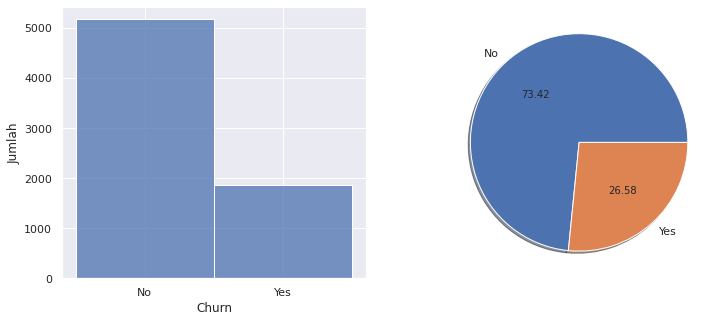

In [17]:
fig = plt.figure(figsize=(12,5)) #penentuan panjang dan lebar figure plot
kolom = 2 #nentuan kolom dalam melakukan plotting
baris = 1 #penentuan baris dalam melakukan plotting
fig.add_subplot(baris,kolom,1)
ax=sns.histplot(df['Churn'])
ax.set(ylabel='Jumlah')
fig.add_subplot(baris,kolom,2)
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, shadow=True,
        autopct='%.2f')
plt.show()

In [18]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Ternyata perbedaan di target kolom dalam dataset ini cukup imbalance dengan perbedaan hampir sebantak 50%. Berarti, kebanyakan data didalam dataset ini masih berlangganan kepada perusahaan Telco

#### Numerical Features

In [19]:
numcol = df.select_dtypes(include='number').columns
len(numcol)

4

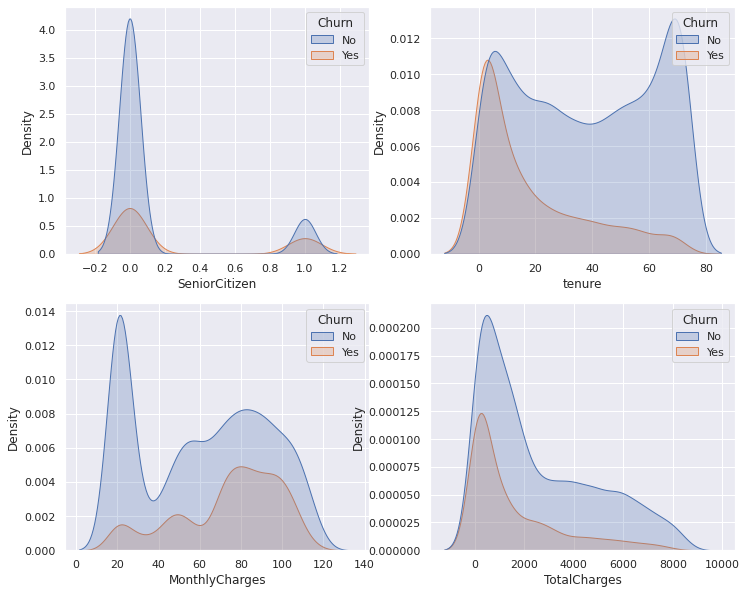

In [21]:
numcol = df.select_dtypes(include='number').columns
fig = plt.figure(figsize=(12,10)) #penentuan panjang dan lebar figure plot
kolom = 2 #nentuan kolom dalam melakukan plotting
baris = 2 #penentuan baris dalam melakukan plotting
for i in range (len(numcol)):
    fig.add_subplot(baris,kolom,i+1)
    sns.kdeplot(df[numcol[i]],hue=df['Churn'], fill=True)

#### EDA Analysis (Numerical Columns)

Dari KDEPlot diatas dapat dikonklusikan bahwa:
- Kebanyakan pelanggan yang berhenti adalah pelanggan yang belum Senior
- Kebanyakan pelanggan yang berhenti ketika baru berlangganan dalam jangka waktu yang sebentar (0-10 bulan). Mungkin dikarenakan adanya ketidak puasan dengan produk atau hanya mengambil promo lalu berhenti berlangganan (jika ada)
- Pelanggan banyak yang berhenti ketika tagihan bulanannya tinggi, tetapi jika dilihat dari total charges belum begitu tinggi. Mungkin dikarenakan, pelanggan tersebut sudah memilih opsi berlangganan yang banyak duluan tetapi kurangnya planning mengenai biaya kedepannya

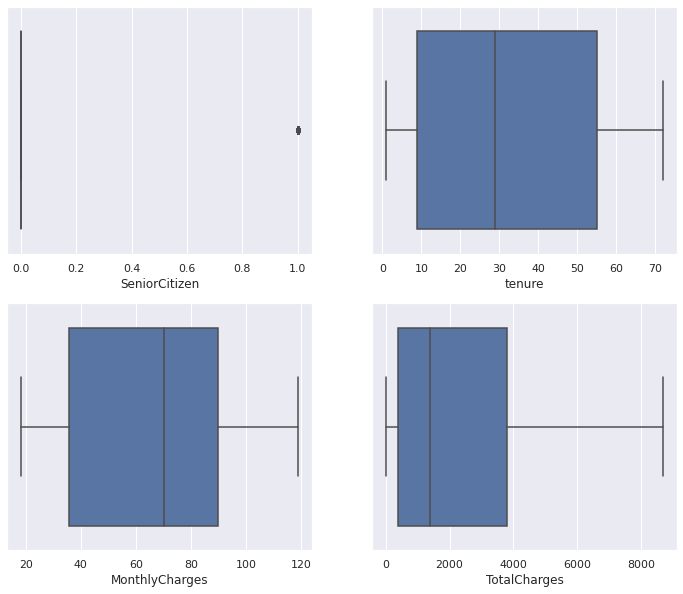

In [22]:
numcol = df.select_dtypes(include='number').columns
fig = plt.figure(figsize=(12,10)) #penentuan panjang dan lebar figure plot
kolom = 2 #nentuan kolom dalam melakukan plotting
baris = 2 #penentuan baris dalam melakukan plotting
for i in range (len(numcol)):
    fig.add_subplot(baris,kolom,i+1)
    sns.boxplot(df[numcol[i]])

Dari boxplot diatas, jika menggunakan metode IQR maka hampir tidak ada data yang di anggap sebagai outlier. Untuk dibagian kolom SeniorCitizen, ada beberapa yang diluar boxplot dikarenakan kolom tersebut memiliki nilai boolean

#### Categorical Data / Object Datatype

#### Churn = Yes (Berhenti berlangganan)

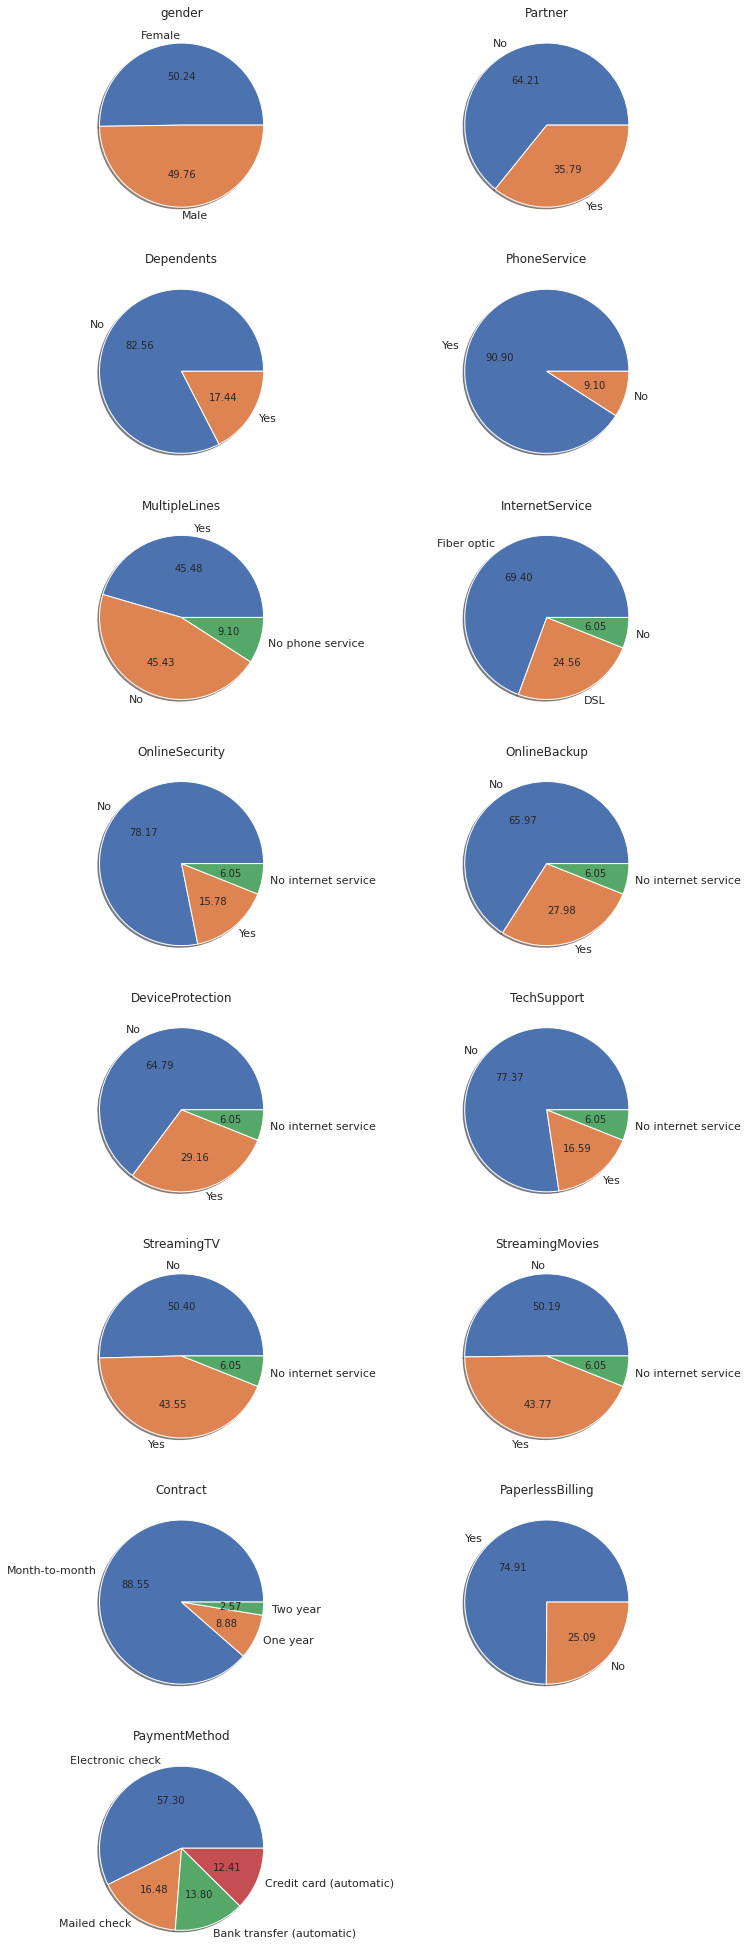

In [23]:
catcol = df.select_dtypes(include='object').columns
catcol = catcol.drop(['customerID','Churn']) #dropping customerID karena tidak ada insight
plot = df[df['Churn'] == 'Yes']
fig = plt.figure(figsize=(12,40)) #penentuan panjang dan lebar figure plot
kolom = 2 #nentuan kolom dalam melakukan plotting
baris = 9 #penentuan baris dalam melakukan plotting
for i in range (len(catcol)):
    fig.add_subplot(baris,kolom,i+1)
    plt.title(catcol[i])
    plt.pie(plot[catcol[i]].value_counts(), labels=plot[catcol[i]].value_counts().index, shadow=True,
            autopct='%.2f')

#### Churn = No (Masih berlangganan)

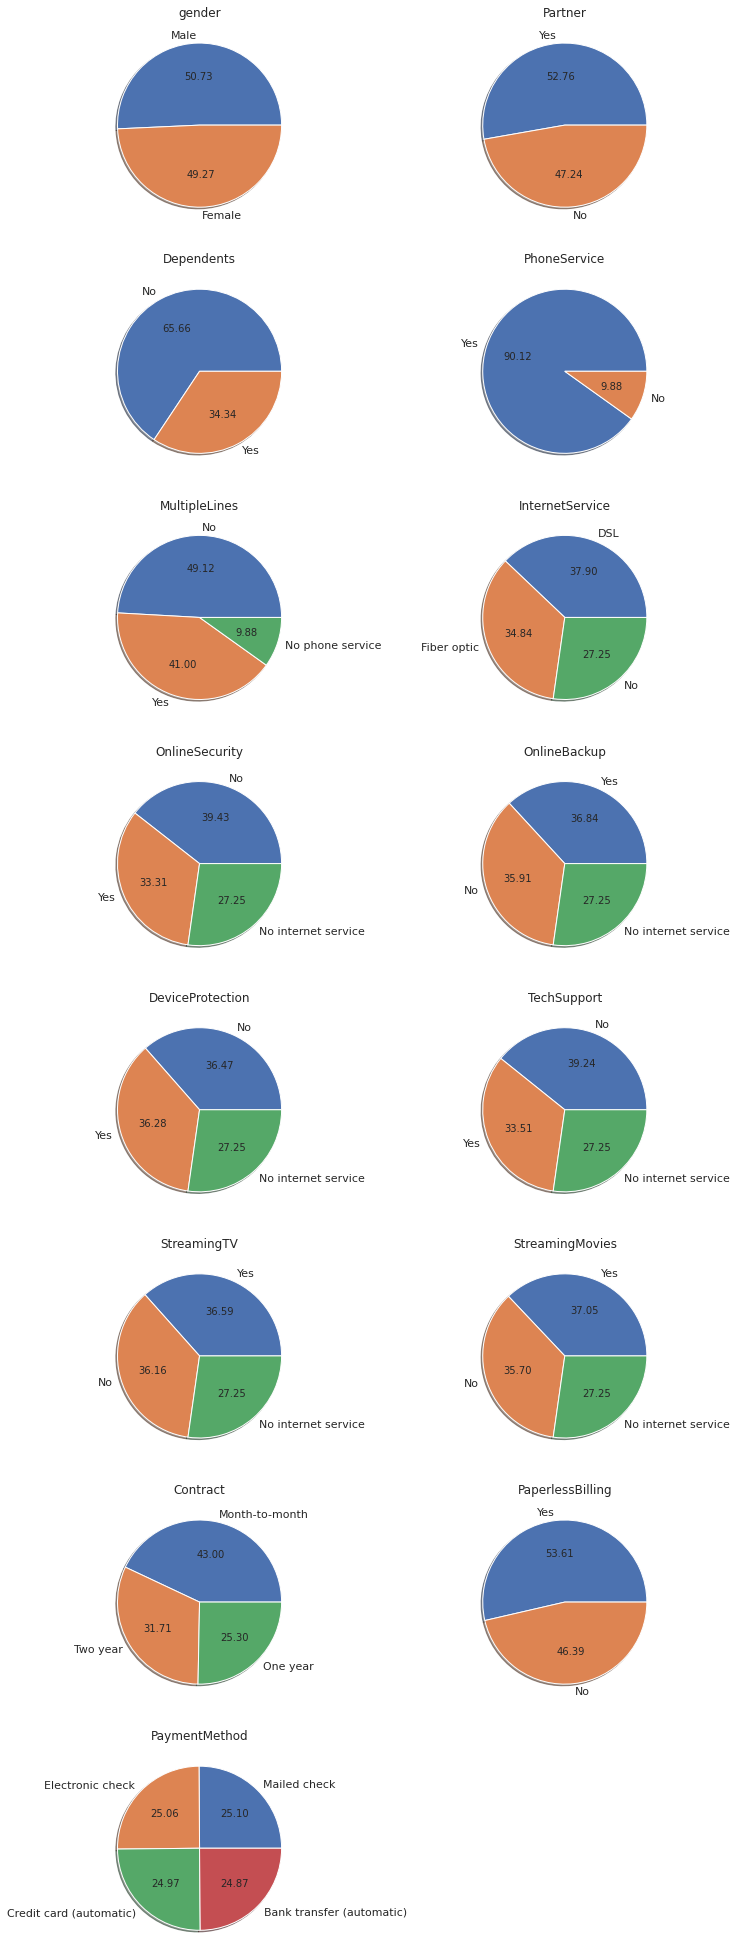

In [24]:
catcol = df.select_dtypes(include='object').columns
catcol = catcol.drop(['customerID','Churn']) #dropping customerID karena tidak ada insight
plot = df[df['Churn'] == 'No']
fig = plt.figure(figsize=(12,40)) #penentuan panjang dan lebar figure plot
kolom = 2 #nentuan kolom dalam melakukan plotting
baris = 9 #penentuan baris dalam melakukan plotting
for i in range (len(catcol)):
    fig.add_subplot(baris,kolom,i+1)
    plt.title(catcol[i])
    plt.pie(plot[catcol[i]].value_counts(), labels=plot[catcol[i]].value_counts().index, shadow=True,
        autopct='%.2f')

#### EDA Analysis (Categorical Columns)

Dari kedua kumpulan piechart di atas dapat disimpulkan bahwa:
- Gender hampir tidak ada sesuatu yang signifikan antara Churn ataupun tidak
- Kebanyakan yang berhenti berlangganan tidak memiliki partner
- Internet service provider dengan Fiber Optic cenderung lebih sering berhenti berlangganan
- Kebanyakan yang berhenti berlangganan terdaftar Multiple lines telefon
- Kebanyakan yang berhenti berlangganan menggunakan kontrak pembayaran bulan-ke-bulan
- Metode pembayaran yang paling sering digunakan untuk pelanggan yang sudah tidak berlangganan adalah Electronic Check yang tidak automatis

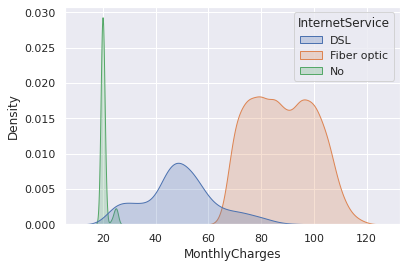

In [25]:
plot = df[df['Churn'] == 'Yes']
sns.kdeplot(plot['MonthlyCharges'], hue=plot['InternetService'], fill=True)

Ternyata, jika dilihat dari KDEPlot di atas dapat di asumsikan bahwa kebanyakan pelanggan yang berlenti berlangganan adalah pelanggan dengan Fiber Optic mungkin salah satu penyebabnya adalah dikarenakan tingginya biaya bulanan

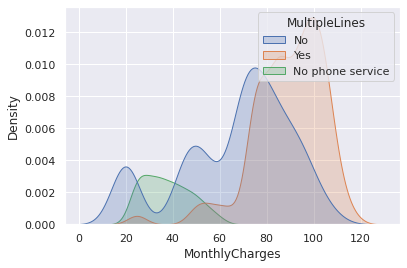

In [26]:
sns.kdeplot(plot['MonthlyCharges'], hue=plot['MultipleLines'], fill=True)

Multiple Lines juga memiliki monthlycharges yang tinggi, maka dari itu mungkin itu juga salah satu penyebab adanya Churn

In [27]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Mana produk yang paling banyak pelanggan yang berhenti?

In [28]:
plot = df[['PhoneService','InternetService','Churn']][df['Churn'] == 'Yes']

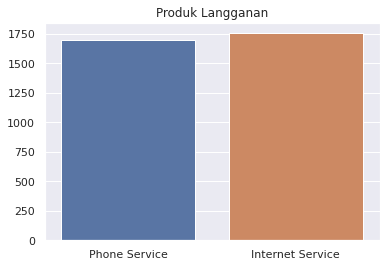

In [29]:
internetSum = plot['InternetService'][plot['InternetService'] != 'No'].value_counts().sum()
phoneSum = plot['PhoneService'][plot['PhoneService'] != 'No'].value_counts().sum()
plt.title('Produk Langganan')
sns.barplot(x=['Phone Service','Internet Service'],y=[phoneSum,internetSum])

In [30]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [31]:
subType = []
for i in range (len(df)):
    if ((df.iloc[i]['PhoneService'] == 'Yes') and (df.iloc[i]['InternetService'] != 'No')):
        subType.append('Both')
    elif (df.iloc[i]['PhoneService'] == 'Yes'):
        subType.append('Phone Only')
    else:
        subType.append('Internet Only')

In [32]:
df_new= df.copy()
df_new['SubscriptionType'] = subType
df_new['SubscriptionType'].value_counts()

Both             4832
Phone Only       1520
Internet Only     680
Name: SubscriptionType, dtype: int64

([<matplotlib.patches.Wedge at 0x7fedd9172b10>,
 [Text(-0.6101052785839529, 0.9152986119534965, 'Both'),
  Text(0.3083621568843314, -1.0558943035179436, 'Phone Only'),
  Text(1.0496290405392321, -0.32905755918484986, 'Internet Only')],
 [Text(-0.3327846974094288, 0.4992537883382708, '68.71'),
  Text(0.16819754011872617, -0.5759423473734238, '21.62'),
  Text(0.5725249312032175, -0.17948594137355445, '9.67')])

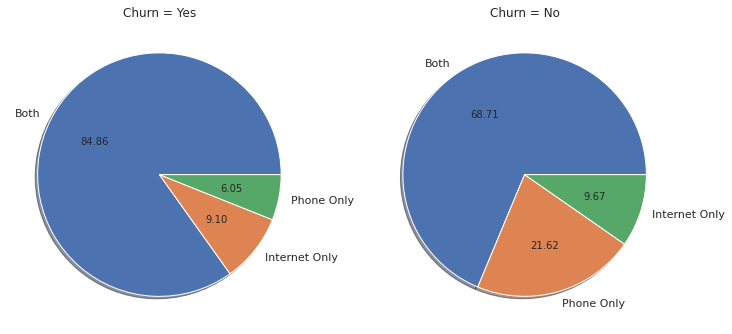

In [33]:
plot = df_new[df_new['Churn'] == 'Yes']
fig = plt.figure(figsize=(12,10)) #penentuan panjang dan lebar figure plot
kolom = 2 #nentuan kolom dalam melakukan plotting
baris = 1 #penentuan baris dalam melakukan plotting
fig.add_subplot(baris,kolom,1)
plt.title('Churn = Yes')
plt.pie(plot['SubscriptionType'].value_counts(),
        labels=plot['SubscriptionType'].value_counts().index, shadow=True,
        autopct='%.2f')

fig.add_subplot(baris,kolom,2)
plot = df_new[df_new['Churn'] == 'No']
plt.title('Churn = No')
plt.pie(df_new['SubscriptionType'].value_counts(),
        labels=df_new['SubscriptionType'].value_counts().index, shadow=True,
        autopct='%.2f')

In [34]:
df_new[df_new['Churn'] == 'No']['SubscriptionType'].value_counts()

Both             3246
Phone Only       1407
Internet Only     510
Name: SubscriptionType, dtype: int64

In [35]:
df_new[df_new['Churn'] == 'Yes']['SubscriptionType'].value_counts()

Both             1586
Internet Only     170
Phone Only        113
Name: SubscriptionType, dtype: int64

In [36]:
df_new['SubscriptionType'].value_counts()

Both             4832
Phone Only       1520
Internet Only     680
Name: SubscriptionType, dtype: int64

#### EDA Analysis (Product Subscription Type)
- Pelanggan mayoritas berlangganan kedua produk (Internet service dan Phone service)
- 170 dari 680 orang (25%) yang hanya berlangganan Internet, berhenti berlangganan. Maka, yang hanya berlangganan Internet cenderung lebih sering berhenti berlangganan


### 6. Data Preprocessing

#### Dropping fitur yang kurang memberikan dampak

In [37]:
 df.drop(['customerID','gender'],axis=1,inplace=True)

#### Melakukan Train, Validation, dan Test split

Pertama, saya akan memisahkan antara fitur dan label dari dataset saya menjadi variabel :
- X: menampung masing-masing fitur dari dataset
- y: menampung target (Churn) dari dataset

In [38]:
X = df.drop('Churn',axis=1).copy()
y = df['Churn']
y.replace({
    'Yes':1,
    'No':0
},inplace=True)

#### Pembuatan pipeline untuk encoding&scaling (sklearn)

Dalam penyelesaian milestone ini saya akan membagi dataset saya menjadi 3 bagian
- Train set -> fit(scaler, classifier)
- Validation set -> transform (scaler), predict (classifier)
- Test set -> transform (scaler), predict (classifier)

In [39]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val =train_test_split(X_train_val, y_train_val, test_size=0.2,
                                                 random_state=42)
# 0.25 x 0.8 = 0.2 / 20%

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_col = X_train.select_dtypes(include='number').columns
cat_col = X_train.select_dtypes(include='object').columns

pre_pipeline = ColumnTransformer([
        ('scaler', StandardScaler(),num_col),
        ('ohe', OneHotEncoder(sparse=False, drop="if_binary"),cat_col), 
        #Parameter: agar jika hanya binary tidak membuat kolom baru, dan semua nya exclusive (sparse)
    ])

In [41]:
# Fitting pipeline
X_train_prepared = pre_pipeline.fit_transform(X_train)

#### Handling Imbalance for Training dataset

Dikarenakan target dalam dataset yang gunakan untuk target nya sangat imbalance, maka saya akan melakukan metode over sampling SMOTE (Synthetic Minority Oversampling Technique).

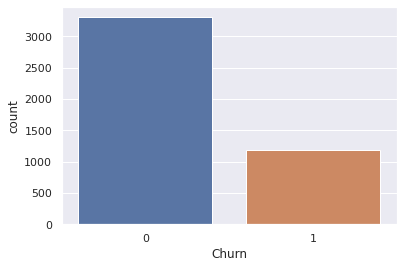

In [42]:
#sebelom SMOTE
sns.countplot(y_train)

In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_os,y_train_os=smote.fit_resample(X_train_prepared,y_train)

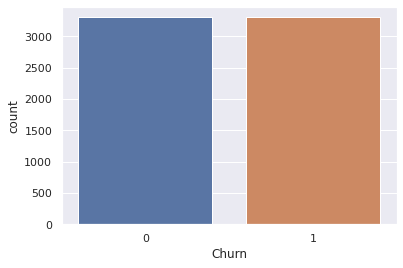

In [44]:
#setelah SMOTE
sns.countplot(y_train_os)

Setelah dilakukan SMOTE, data meningkat dari 4500 menjadi 6608 dan pembuatan data baru tersebut bersifat sintetis atau mengikuti karakteristik class yang minority lainnya.

### 7.Pendefinisian Model

#### Sequential API

In [45]:
keras.backend.clear_session()

In [46]:
model_seq = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [47]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_seq.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
X_val_prepared = pre_pipeline.transform(X_val)
X_test_prepared = pre_pipeline.transform(X_test)

### 8. Training Model

In [49]:
history = model_seq.fit(X_train_os,y_train_os, epochs=30, validation_data=(X_val_prepared,y_val))

Epoch 1/30
207/207 [==============================] - 2s 3ms/step - loss: 0.6127 - accuracy: 0.6923 - val_loss: 0.5884 - val_accuracy: 0.7182
Epoch 2/30
207/207 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.7402 - val_loss: 0.5598 - val_accuracy: 0.7164
Epoch 3/30
207/207 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7524 - val_loss: 0.5341 - val_accuracy: 0.7324
Epoch 4/30
207/207 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7583 - val_loss: 0.5247 - val_accuracy: 0.7387
Epoch 5/30
207/207 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.7622 - val_loss: 0.5132 - val_accuracy: 0.7422
Epoch 6/30
207/207 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7686 - val_loss: 0.5127 - val_accuracy: 0.7449
Epoch 7/30
207/207 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7698 - val_loss: 0.5045 - val_accuracy: 0.7476
Epoch 

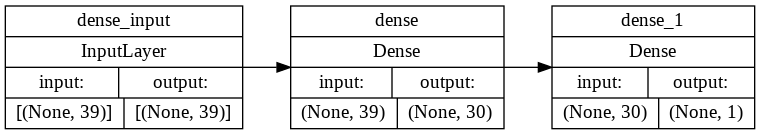

In [50]:
keras.utils.plot_model(model_seq, show_shapes=True, rankdir="LR")

### 9. Model Evaluation

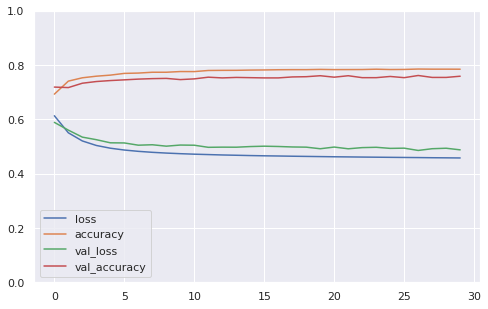

In [51]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Model Improvement

Dalam model improvement, saya akan menambahkan:
- kernel initializer (penentuan weight pertama) -> untuk 'ReLU' berdasarkan artikel yang saya baca akan lebih optimal untuk menggunakan HeNormal
- batch normalization -> melakukan standarisasi input terhadap layer untuk setiap mini batch
- drop out -> mengubah input unit secara acak menjadi 0 saat training

In [52]:
model_seq = keras.models.Sequential([
    keras.layers.Dense(20,activation="relu",kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    keras.layers.Dense(10,activation="relu",kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Dense(1,activation="sigmoid")
])

In [53]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_seq.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [54]:
history = model_seq.fit(X_train_os,y_train_os, epochs=100, validation_data=(X_val_prepared,y_val))

Epoch 1/100
207/207 [==============================] - 2s 3ms/step - loss: 0.7015 - accuracy: 0.6229 - val_loss: 0.6359 - val_accuracy: 0.6222
Epoch 2/100
207/207 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.6731 - val_loss: 0.6099 - val_accuracy: 0.6551
Epoch 3/100
207/207 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.7031 - val_loss: 0.5864 - val_accuracy: 0.6738
Epoch 4/100
207/207 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.7161 - val_loss: 0.5706 - val_accuracy: 0.6800
Epoch 5/100
207/207 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.7225 - val_loss: 0.5574 - val_accuracy: 0.6907
Epoch 6/100
207/207 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.7391 - val_loss: 0.5450 - val_accuracy: 0.7049
Epoch 7/100
207/207 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.7429 - val_loss: 0.5444 - val_accuracy: 0.7067

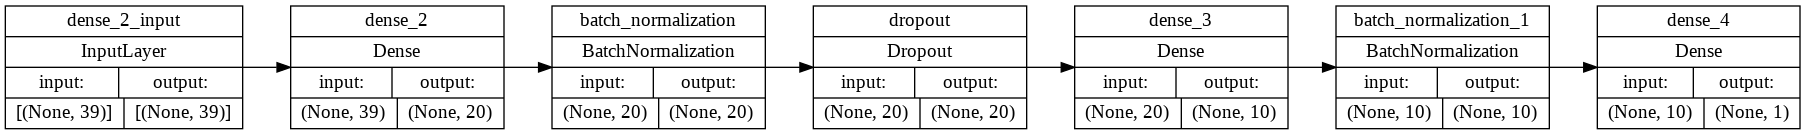

In [55]:
keras.utils.plot_model(model_seq, show_shapes=True, rankdir="LR")

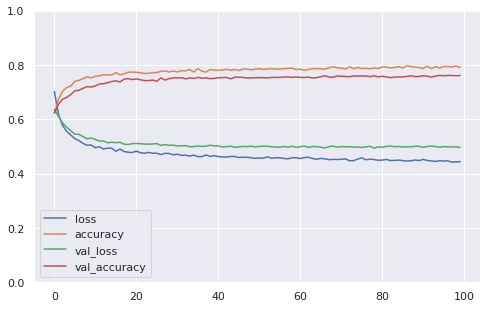

In [56]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Dapat di simpulkan bahwa, hasil dari akurasi meningkat cukup tinggi dan loss punt menurun. Tetapi untuk dibagian validasi hampir tidak ada perbedaan antara setelah di improve ataupun sebelum

In [57]:
y_pred = model_seq.predict(X_test_prepared)

In [58]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
classes = []
for i in y_pred:
    classes.append(1) if i>=0.5 else classes.append(0)


accuracy = accuracy_score(y_test, classes)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, classes)
print('Precision: %f' % precision)

recall = recall_score(y_test, classes)
print('Recall: %f' % recall)

f1 = f1_score(y_test, classes)
print('F1 score: %f' % f1)

matrix = confusion_matrix(y_test, classes)
print(matrix)

Accuracy: 0.731343
Precision: 0.496516
Recall: 0.762032
F1 score: 0.601266
[[744 289]
 [ 89 285]]


Hasil untuk model improvement dalam sequential API nilai nya kurang memuaskan yaitu di 72% untuk melakukan prediksi terhadap testing data

#### Pembuatan pipeline menggunakan tensorflow untuk functional api

In [59]:
train_val_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_val_df.index)
val_df = train_val_df.sample(frac=0.2,random_state=42)
train_df = train_val_df.drop(val_df.index)

print(
    "Menggunakan %d samples untuk training , %d untuk validation, %d untuk testing"
    % (len(train_df), len(val_df), len(test_df))
)

Menggunakan 4501 samples untuk training , 1125 untuk validation, 1406 untuk testing


Lalu, saya akan mengubah dataframe itu akan saya jadikan dataset menggunakan library tensorflow

In [60]:
def dataframe_to_dataset(df):
    dataframe = df.copy()
    labels = dataframe.pop("Churn")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

train_ds = dataframe_to_dataset(train_df)
val_ds = dataframe_to_dataset(val_df)
test_ds = dataframe_to_dataset(test_df)

In [61]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'SeniorCitizen': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'Partner': <tf.Tensor: shape=(), dtype=string, numpy=b'No'>, 'Dependents': <tf.Tensor: shape=(), dtype=string, numpy=b'No'>, 'tenure': <tf.Tensor: shape=(), dtype=int64, numpy=15>, 'PhoneService': <tf.Tensor: shape=(), dtype=string, numpy=b'Yes'>, 'MultipleLines': <tf.Tensor: shape=(), dtype=string, numpy=b'No'>, 'InternetService': <tf.Tensor: shape=(), dtype=string, numpy=b'Fiber optic'>, 'OnlineSecurity': <tf.Tensor: shape=(), dtype=string, numpy=b'No'>, 'OnlineBackup': <tf.Tensor: shape=(), dtype=string, numpy=b'Yes'>, 'DeviceProtection': <tf.Tensor: shape=(), dtype=string, numpy=b'No'>, 'TechSupport': <tf.Tensor: shape=(), dtype=string, numpy=b'No'>, 'StreamingTV': <tf.Tensor: shape=(), dtype=string, numpy=b'No'>, 'StreamingMovies': <tf.Tensor: shape=(), dtype=string, numpy=b'No'>, 'Contract': <tf.Tensor: shape=(), dtype=string, numpy=b'Month-to-month'>, 'PaperlessBilling': <tf.Tensor: shape=(), dtype=string, num

Melakukan batching terhadap dataset

In [62]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)
test_ds = test_ds.batch(32)

#### Pipeline feature preprocessing menggunakan Keras Layers

In [63]:
from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import StringLookup

def encode_numerical_feature(feature, name, dataset):
    # Pembuatan normalisasi layer
    normalizer = Normalization()

    # Pembuatan dataset untuk fitur saja
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))
    
    # Melakukan normalisasi fitur
    normalizer.adapt(feature_ds)
    encoded_feature = normalizer(feature)
    return encoded_feature

def encode_categorical_feature(feature, name, dataset, is_string):
    if is_string == True:
        lookup_class=StringLookup
    else:
        lookup_class=IntegerLookup
    # Membuat layer untuk mengubah string menjadi integer
    lookup = lookup_class(output_mode="binary")

    # Pembuatan dataset untuk fitur saja
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Melakukan adaptasi terhadap kemungkinan string 
    lookup.adapt(feature_ds)

    # Mengubah input string menjadi integer
    encoded_feature = lookup(feature)
    return encoded_feature

In [64]:
#Categorical dari string
k_paymentmethod = tf.keras.Input(name='PaymentMethod', shape=(1,), dtype="string")
k_paperlessbill = tf.keras.Input(name='PaperlessBilling', shape=(1,), dtype="string")
k_contract = tf.keras.Input(name='Contract', shape=(1,), dtype="string")
k_streammovies = tf.keras.Input(name='StreamingMovies', shape=(1,), dtype="string")
k_streamtv = tf.keras.Input(name='StreamingTV', shape=(1,), dtype="string")
k_techsupport = tf.keras.Input(name='TechSupport', shape=(1,), dtype="string")
k_deviceprotection = tf.keras.Input(name='DeviceProtection', shape=(1,), dtype="string")
k_onlinebackup = tf.keras.Input(name='OnlineBackup', shape=(1,), dtype="string")
k_onlinesecurity = tf.keras.Input(name='OnlineSecurity', shape=(1,), dtype="string")
k_internet = tf.keras.Input(name='InternetService', shape=(1,), dtype="string")
k_multi = tf.keras.Input(name='MultipleLines', shape=(1,), dtype="string")
k_phone = tf.keras.Input(name='PhoneService', shape=(1,), dtype="string")
k_dependents = tf.keras.Input(name='Dependents', shape=(1,), dtype="string")
k_partner = tf.keras.Input(name='Partner',shape=(1,), dtype="string")


#Categorical dari integer
k_senior = tf.keras.Input(name='SeniorCitizen', shape=(1,), dtype="int64")

#Fitur numerical
k_totalcharges = tf.keras.Input(name='TotalCharges', shape=(1,))
k_tenure = tf.keras.Input(name='tenure', shape=(1,))
k_monthlycharges = tf.keras.Input(name='MonthlyCharges', shape=(1,))


In [65]:
# list untuk menampung semua fitur
all_inputs = [
    k_totalcharges,k_monthlycharges,k_tenure,k_paymentmethod,k_paperlessbill,
    k_contract,k_streammovies,k_streamtv,k_techsupport,k_deviceprotection,k_onlinebackup,
    k_onlinesecurity,k_internet,k_multi,k_phone,k_dependents,k_senior,k_partner                     
]

#### Encoding

In [66]:
keras.backend.clear_session()

In [67]:
#input processing
#String Categorical
cat_partner = encode_categorical_feature(k_partner, "Partner", train_ds, True)
cat_dependents = encode_categorical_feature(k_dependents, "Dependents", train_ds, True)
cat_phone = encode_categorical_feature(k_phone, "PhoneService", train_ds, True)
cat_multi = encode_categorical_feature(k_multi, "MultipleLines", train_ds, True)
cat_internet = encode_categorical_feature(k_internet, "InternetService", train_ds, True)
cat_onlinesecurity = encode_categorical_feature(k_onlinesecurity, "OnlineSecurity", train_ds, True)
cat_onlinebackup = encode_categorical_feature(k_onlinebackup, "OnlineBackup", train_ds, True)
cat_deviceprotection = encode_categorical_feature(k_deviceprotection, "DeviceProtection", train_ds, True)
cat_techsupport = encode_categorical_feature(k_techsupport, "TechSupport", train_ds, True)
cat_streamtv = encode_categorical_feature(k_streamtv, "StreamingTV", train_ds, True)
cat_streammovies = encode_categorical_feature(k_streammovies, "StreamingMovies", train_ds, True)
cat_contract = encode_categorical_feature(k_contract, "Contract", train_ds, True)
cat_paperlessbill = encode_categorical_feature(k_paperlessbill, "PaperlessBilling", train_ds, True)
cat_paymentmethod = encode_categorical_feature(k_paymentmethod, "PaymentMethod", train_ds, True)

#Integer Categorical
cat_senior = encode_categorical_feature(k_senior, "SeniorCitizen", train_ds, False)

#Fitur numerical
num_tenure = encode_numerical_feature(k_tenure, "tenure", train_ds)
num_monthlycharges = encode_numerical_feature(k_monthlycharges, "MonthlyCharges", train_ds)
num_totalcharges = encode_numerical_feature(k_totalcharges, "TotalCharges", train_ds)

#### Pembuatan Model

In [68]:
num_features = tf.keras.layers.concatenate([
    num_tenure,num_monthlycharges,num_totalcharges
])
x_num = tf.keras.layers.Dense(32, activation="relu")(num_features)
cat_features = tf.keras.layers.concatenate([
    cat_dependents,cat_phone,cat_multi,cat_internet,cat_onlinesecurity,cat_onlinebackup,
    cat_deviceprotection,cat_techsupport,cat_streamtv,cat_streammovies,cat_contract,
    cat_paperlessbill,cat_paymentmethod,cat_senior,cat_partner
])
x_cat = tf.keras.layers.Dense(32, activation="relu")(cat_features)
x = tf.keras.layers.concatenate([x_cat, x_num])
x = tf.keras.layers.Dense(32, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [69]:
model_func = tf.keras.Model(all_inputs, output)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_func.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

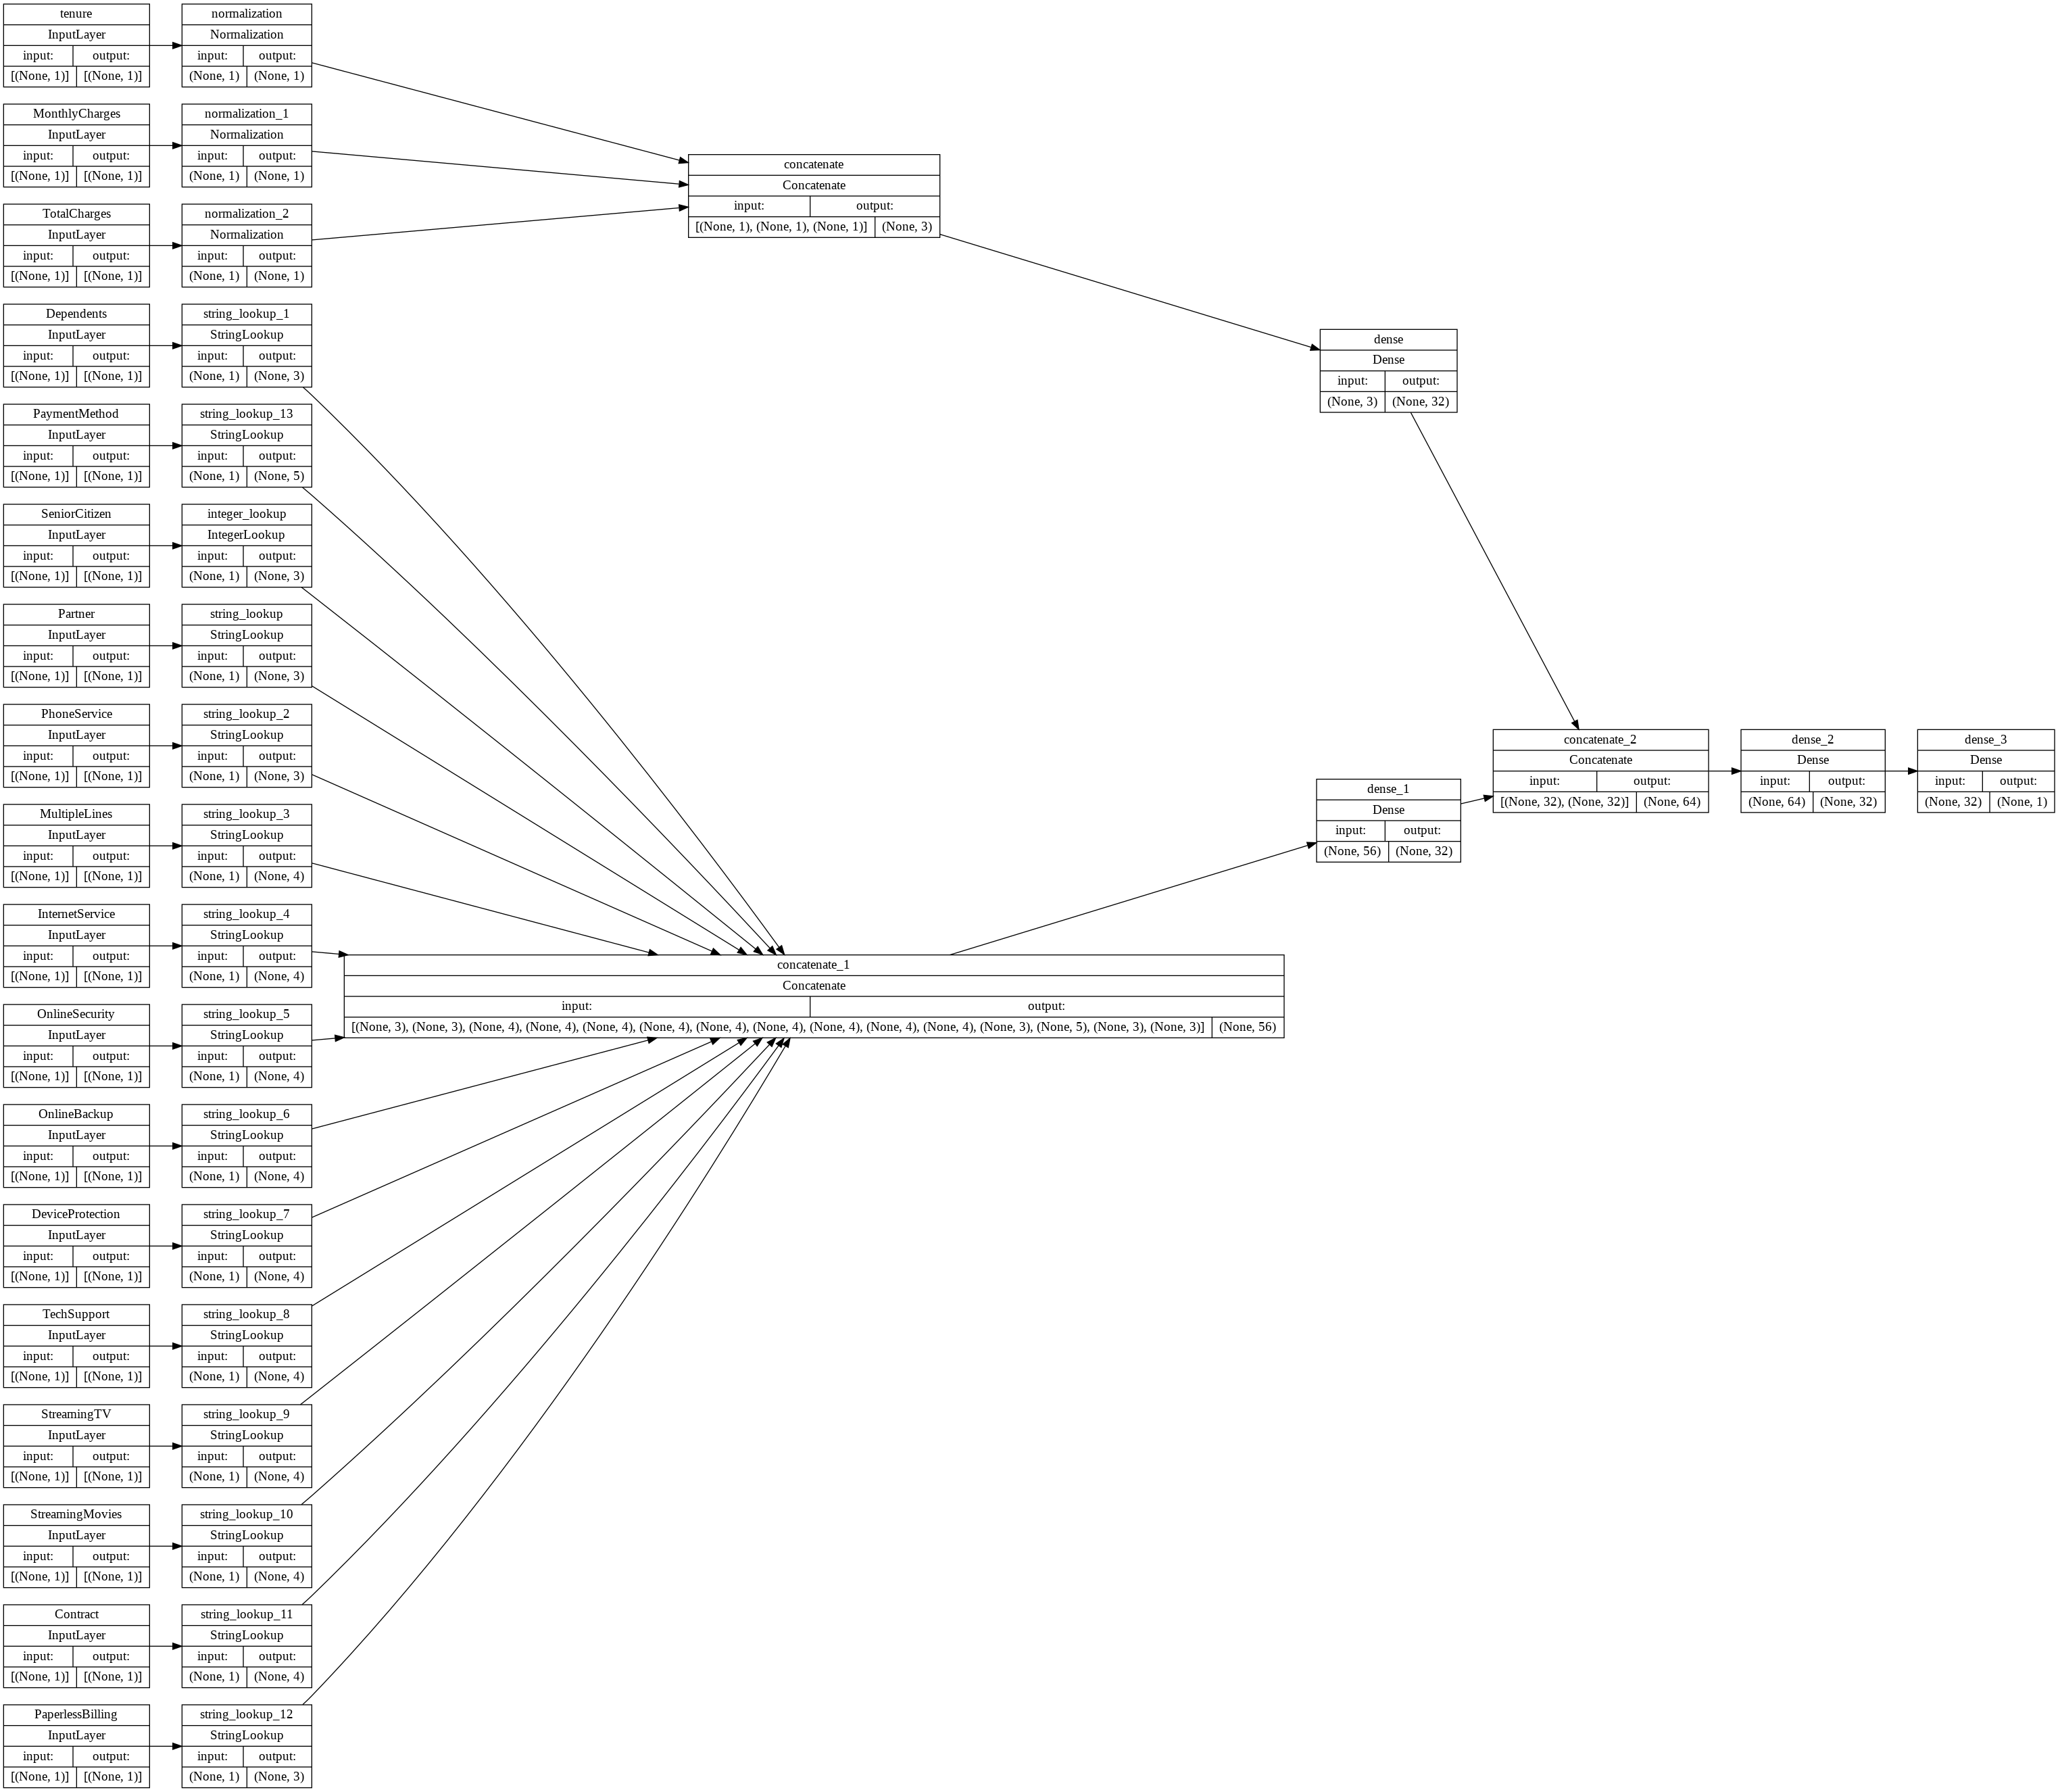

In [70]:
keras.utils.plot_model(model_func, show_shapes=True, rankdir="LR")

#### Training Model

In [71]:
history = model_func.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
141/141 [==============================] - 2s 7ms/step - loss: 0.5911 - accuracy: 0.7203 - val_loss: 0.5456 - val_accuracy: 0.7342
Epoch 2/50
141/141 [==============================] - 1s 4ms/step - loss: 0.5111 - accuracy: 0.7438 - val_loss: 0.4927 - val_accuracy: 0.7618
Epoch 3/50
141/141 [==============================] - 1s 4ms/step - loss: 0.4741 - accuracy: 0.7649 - val_loss: 0.4645 - val_accuracy: 0.7867
Epoch 4/50
141/141 [==============================] - 1s 4ms/step - loss: 0.4551 - accuracy: 0.7858 - val_loss: 0.4498 - val_accuracy: 0.7902
Epoch 5/50
141/141 [==============================] - 1s 4ms/step - loss: 0.4450 - accuracy: 0.7892 - val_loss: 0.4422 - val_accuracy: 0.7893
Epoch 6/50
141/141 [==============================] - 1s 4ms/step - loss: 0.4398 - accuracy: 0.7925 - val_loss: 0.4365 - val_accuracy: 0.7991
Epoch 7/50
141/141 [==============================] - 1s 4ms/step - loss: 0.4358 - accuracy: 0.7956 - val_loss: 0.4334 - val_accuracy: 0.7982
Epoch 

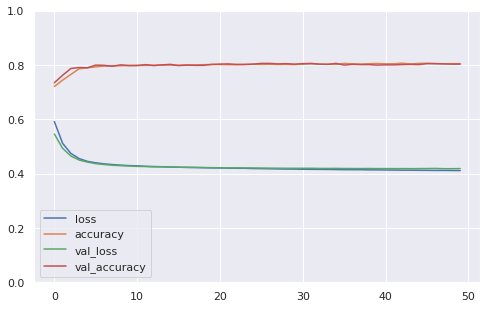

In [72]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [73]:
test_scores = model_func.evaluate(test_ds, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

44/44 - 0s - loss: 0.3922 - accuracy: 0.8151 - 124ms/epoch - 3ms/step
Test loss: 0.39223653078079224
Test accuracy: 0.8150782585144043


#### Model Improvement

In [74]:
num_features = tf.keras.layers.concatenate([
    num_tenure,num_monthlycharges,num_totalcharges
])
x_num = tf.keras.layers.Dense(32, activation="relu",kernel_initializer="he_uniform")(num_features)
cat_features = tf.keras.layers.concatenate([
    cat_dependents,cat_phone,cat_multi,cat_internet,cat_onlinesecurity,cat_onlinebackup,
    cat_deviceprotection,cat_techsupport,cat_streamtv,cat_streammovies,cat_contract,
    cat_paperlessbill,cat_paymentmethod,cat_senior,cat_partner
])
x_cat = tf.keras.layers.Dense(32, activation="relu")(cat_features)
x = tf.keras.layers.concatenate([x_cat, x_num])
x = tf.keras.layers.Dense(32, activation='relu', kernel_initializer="he_uniform",
                                  activity_regularizer=tf.keras.regularizers.l2(0.00001))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [75]:
model_func_2 = tf.keras.Model(all_inputs, output)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_func_2.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

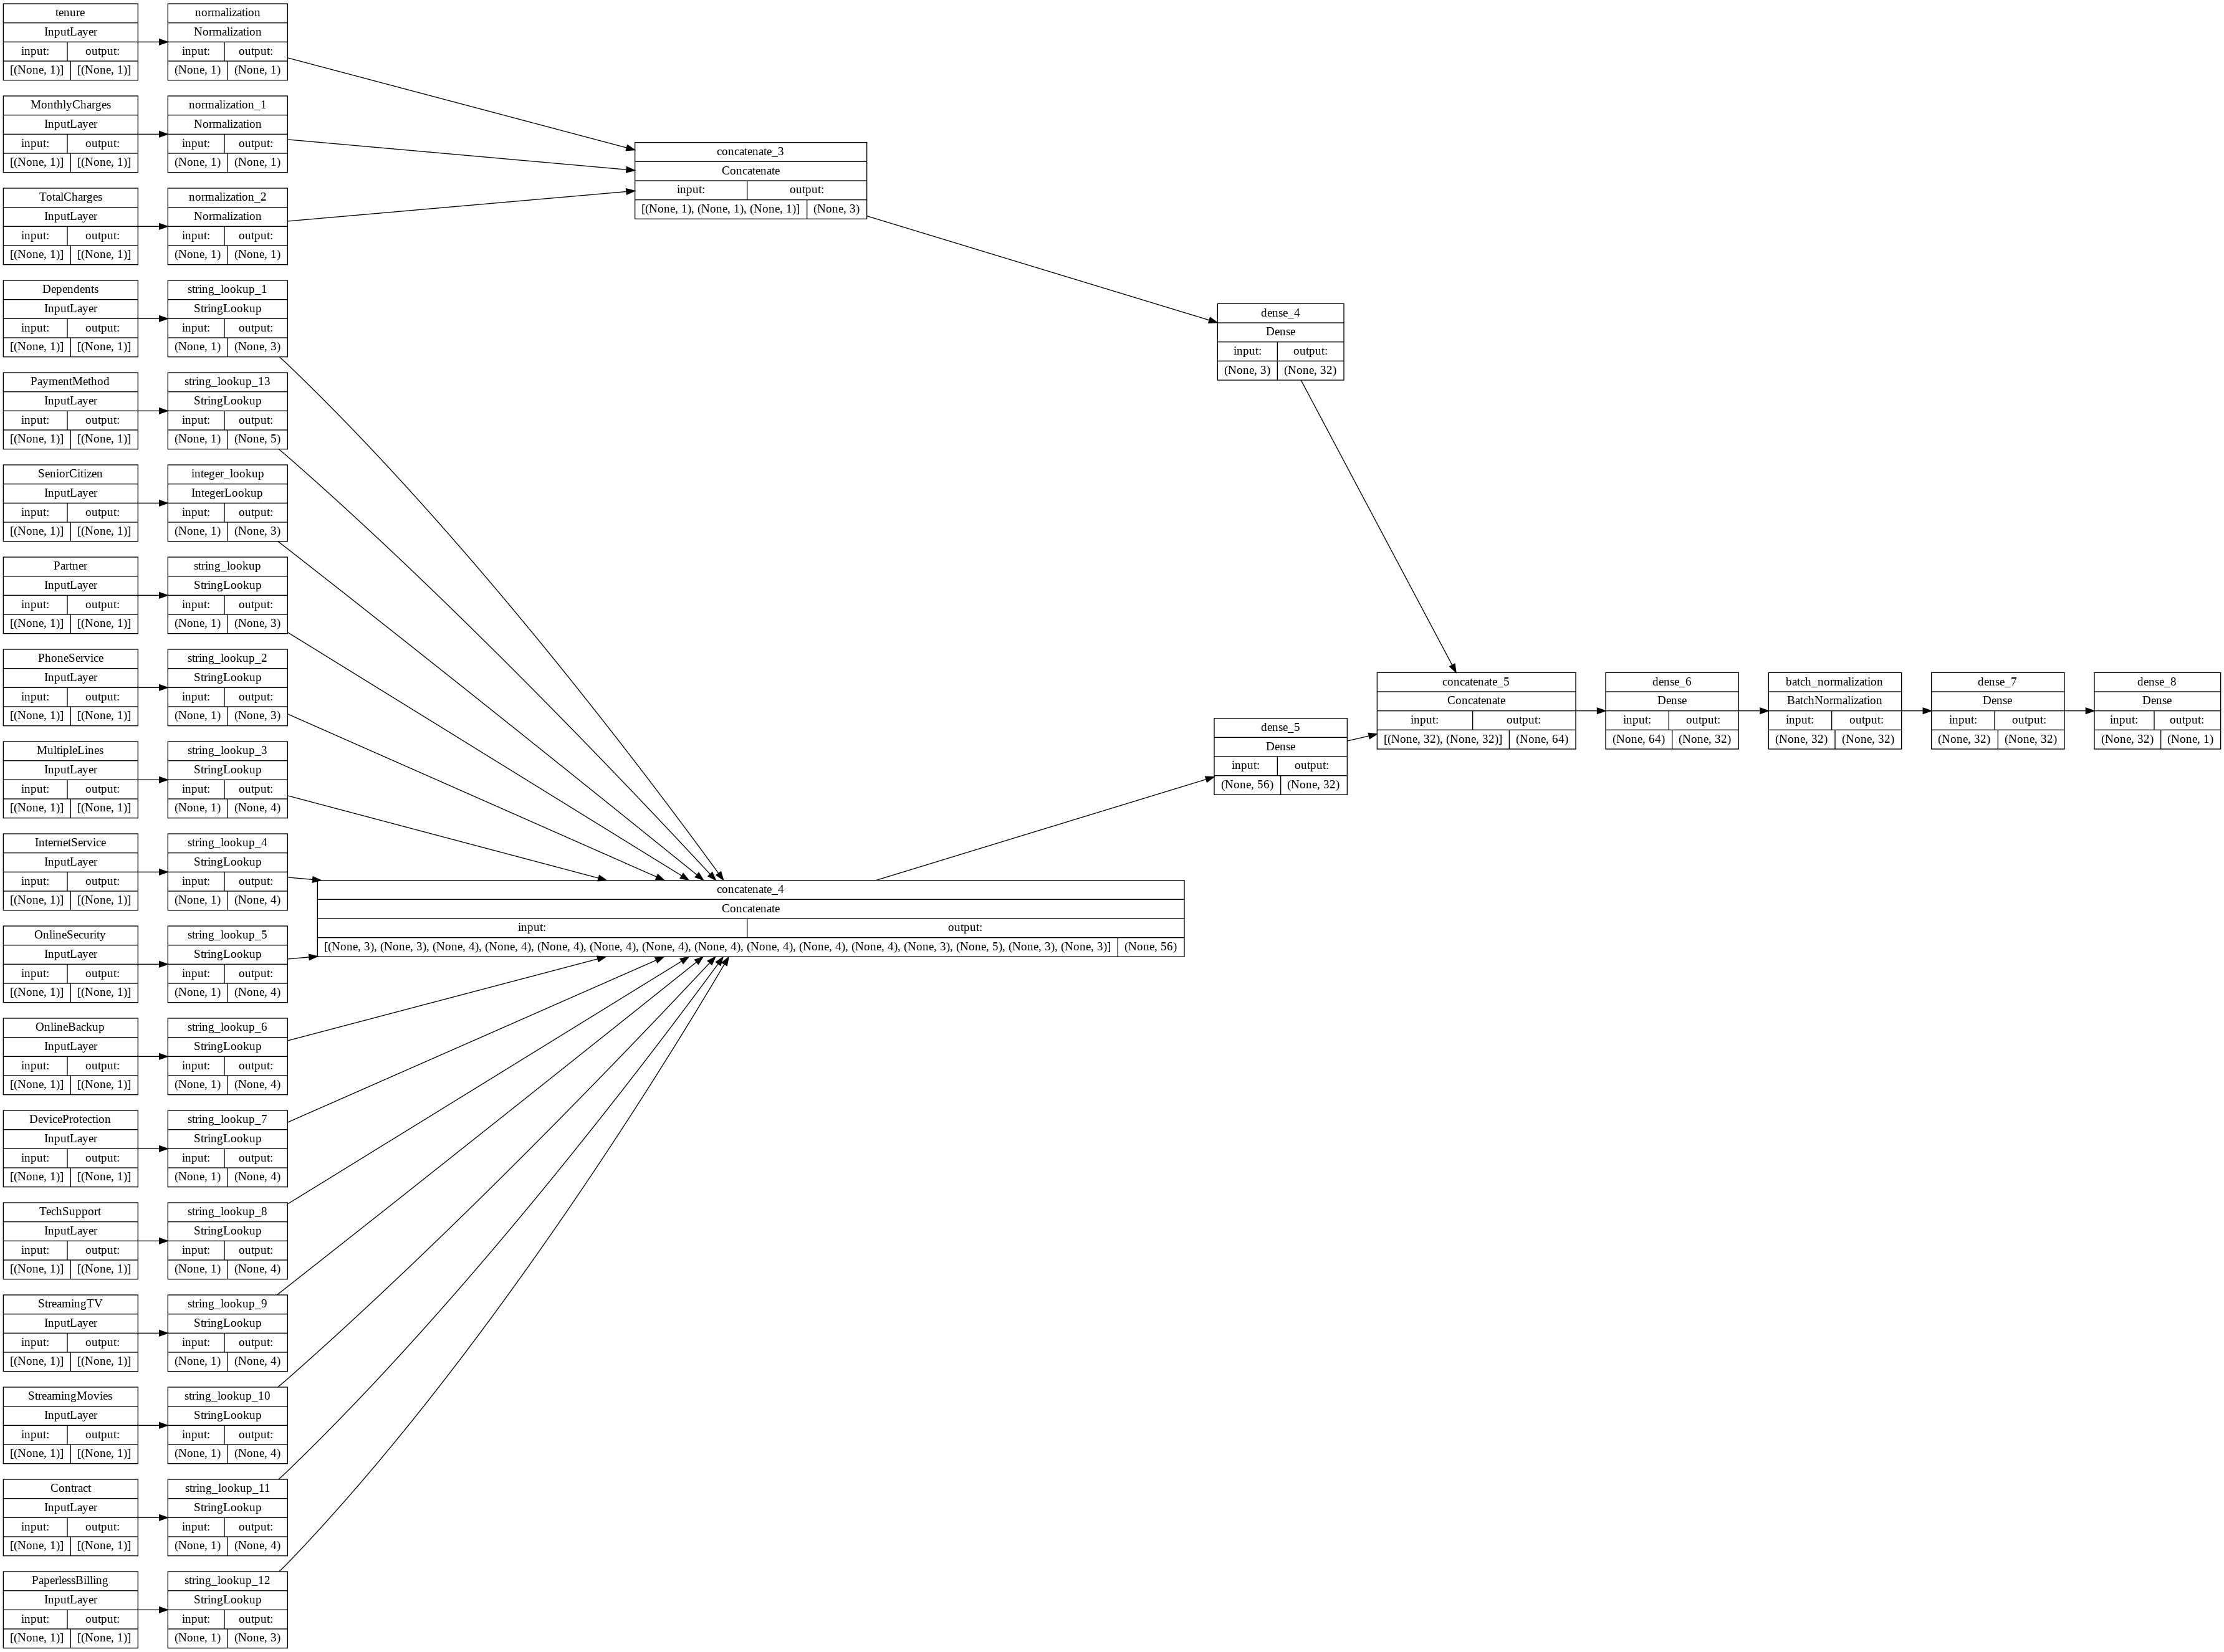

In [76]:
keras.utils.plot_model(model_func_2, show_shapes=True, rankdir="LR")

In [77]:
history = model_func_2.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
141/141 [==============================] - 3s 8ms/step - loss: 0.5507 - accuracy: 0.7394 - val_loss: 0.5649 - val_accuracy: 0.7769
Epoch 2/50
141/141 [==============================] - 1s 4ms/step - loss: 0.4900 - accuracy: 0.7732 - val_loss: 0.4927 - val_accuracy: 0.7831
Epoch 3/50
141/141 [==============================] - 1s 4ms/step - loss: 0.4666 - accuracy: 0.7840 - val_loss: 0.4599 - val_accuracy: 0.7840
Epoch 4/50
141/141 [==============================] - 1s 4ms/step - loss: 0.4515 - accuracy: 0.7896 - val_loss: 0.4469 - val_accuracy: 0.7893
Epoch 5/50
141/141 [==============================] - 1s 5ms/step - loss: 0.4470 - accuracy: 0.7903 - val_loss: 0.4409 - val_accuracy: 0.7902
Epoch 6/50
141/141 [==============================] - 1s 4ms/step - loss: 0.4377 - accuracy: 0.7947 - val_loss: 0.4366 - val_accuracy: 0.7947
Epoch 7/50
141/141 [==============================] - 1s 4ms/step - loss: 0.4369 - accuracy: 0.7978 - val_loss: 0.4340 - val_accuracy: 0.7956
Epoch 

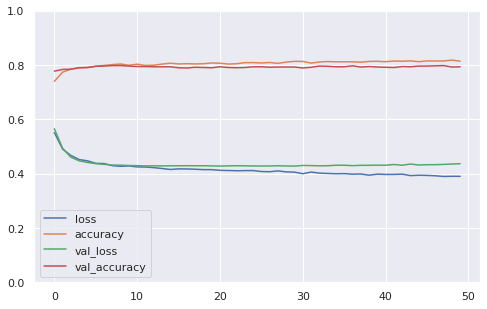

In [78]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [79]:
test_scores = model_func_2.evaluate(test_ds, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

44/44 - 0s - loss: 0.4031 - accuracy: 0.8023 - 118ms/epoch - 3ms/step
Test loss: 0.40309327840805054
Test accuracy: 0.8022759556770325


Dari hasil evaluasi untuk FunctionalAPI, hasil sebelum dilakukan batch_normalization dan tanpa regularization(L2/Ridge Regression) memiliki akurasi yang lebih tinggi dibandingkan setelah dilakukan fine tuning. Maka dari itu, untuk model terakhir dalam deployment dan model inference saya akan menggunakan sebelum dilakukan model tuning

### Model Inference

In [80]:
sample = {
    'SeniorCitizen':0,
    'Partner':'Yes',
    'Dependents':'Yes',
    'tenure':26,
    'PhoneService':'Yes',
    'MultipleLines':'No',
    'InternetService':'Fiber optic',
    'OnlineSecurity':'Yes',
    'OnlineBackup':'Yes',
    'DeviceProtection':'Yes',
    'TechSupport':'Yes',
    'StreamingTV':'Yes',
    'StreamingMovies':'Yes',
    'Contract':'Two year',
    'PaperlessBilling':'No',
    'PaymentMethod': 'Credit card (automatic)',
    'MonthlyCharges':114.05,
    'TotalCharges':8468.2
}

#### SequentialAPI with sklearn pipeline

In [81]:
sample_df = pd.Series(sample)
sample_df = pd.DataFrame(sample_df)
sample_df = sample_df.T
sample_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Yes,Yes,26,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),114.05,8468.2


In [82]:
sample_df = pre_pipeline.transform(sample_df)

In [83]:
model_seq.predict(sample_df)

array([[0.25040367]], dtype=float32)

Hasil prediksi inference jika menggunakan model sequential API, adalah pelanggan tersebut tidak berhenti berlangganan atau memiliki probabilitas Churn yang sangat rendah. 

#### Functional API with Tensorflow pipeline

In [84]:
input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model_func_2.predict(input_dict)

In [85]:
predictions

array([[0.01159972]], dtype=float32)

Hasil dari functional API juga memprediksi bahwa pelanggan tersebut tidak berhenti berlangganan dan memiliki probabilitas untuk berhenti berlangganan yang lebih rendah dibandingkan prediksi menggunakan Sequential API

### Model Analysis
Jika di bandingkan untuk dibagian Functional API dan Sequential API, sequential API memiliki grafik yang berkembang tetapi tidak mendapatkan hasil yang se optimal functional API. Untuk grafik functional API, sudah bermula di akurasi yang cukup bagus dengan prediksi terhadap data validasi juga bagus (+- 80% untuk masing-masing). Tetapi, dikarenakan mungkin datasetnya terlalu simple untuk di ukur dari jumlah fitur, dan jumlah data. Mungkin hasil yang didapatkan ketika menggunakan functional API dengan data pipeline malah menghasilkan hasil prediksi terhadap testing data sangat rendah. Tetapi, jika dilihat dari proses training dan validation memiliki hasil yang lebih baik dibandingkan dengan Sequential API.

*EDA Analysis ada di bagian EDA untuk masing-masing tipe data*

#### Menyimpan model FunctionalAPI untuk deployment

In [86]:
model_func_2.save('final_complete_model/')

INFO:tensorflow:Assets written to: final_complete_model/assets


INFO:tensorflow:Assets written to: final_complete_model/assets


In [87]:
test_model = keras.models.load_model('final_complete_model/')

In [88]:
test_model.predict(input_dict)

array([[0.01159972]], dtype=float32)